<a href="https://colab.research.google.com/github/moonisshakeel/Data-Manipulation-Visualization-and-Analysis/blob/master/electricity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import os
import csv
import numpy as np 
import datetime
#from DateTimeutil import parser

In [12]:
from google.colab import drive

In [13]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [109]:
filename = r'/content/drive/MyDrive/NEMprice_FullData.csv'
import csv
open(filename)

<_io.TextIOWrapper name='/content/drive/MyDrive/NEMprice_FullData.csv' mode='r' encoding='UTF-8'>

In [110]:
print(filename)

/content/drive/MyDrive/NEMprice_FullData.csv


In [111]:
data=pd.read_csv('/content/drive/MyDrive/NEMprice_FullData.csv')
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Date,Time,DateTime,NSW1,QLD1,SA1,VIC1,TAS1
0,1-Jan-99,0:30:00,1-Jan-99 0:30,27.64,19.34,36.01,30.52,.
1,1-Jan-99,1:00:00,1-Jan-99 1:00,26.64,17.47,35.7,28.74,.
2,1-Jan-99,1:30:00,1-Jan-99 1:30,25.81,17.08,31.67,27.94,.
3,1-Jan-99,2:00:00,1-Jan-99 2:00,19.94,15.84,22.42,20.9,.
4,1-Jan-99,2:30:00,1-Jan-99 2:30,19.48,15.68,21.38,20.26,.


In [112]:
data['DateTime'] = pd.to_datetime(data['DateTime'], format='%d-%b-%y %H:%M')
data.head()

,Date,Time,DateTime,NSW1,QLD1,SA1,VIC1,TAS1
0,1-Jan-99,0:30:00,1999-01-01 00:30:00,27.64,19.34,36.01,30.52,.
1,1-Jan-99,1:00:00,1999-01-01 01:00:00,26.64,17.47,35.7,28.74,.
2,1-Jan-99,1:30:00,1999-01-01 01:30:00,25.81,17.08,31.67,27.94,.
3,1-Jan-99,2:00:00,1999-01-01 02:00:00,19.94,15.84,22.42,20.9,.
4,1-Jan-99,2:30:00,1999-01-01 02:30:00,19.48,15.68,21.38,20.26,.


In [113]:
data = pd.DataFrame(data)

In [114]:
# delete the column
del data['TAS1']
del data['Date']
del data['Time']
data.head()

,DateTime,NSW1,QLD1,SA1,VIC1
0,1999-01-01 00:30:00,27.64,19.34,36.01,30.52
1,1999-01-01 01:00:00,26.64,17.47,35.7,28.74
2,1999-01-01 01:30:00,25.81,17.08,31.67,27.94
3,1999-01-01 02:00:00,19.94,15.84,22.42,20.9
4,1999-01-01 02:30:00,19.48,15.68,21.38,20.26


In [115]:
data['year'] = (data['DateTime']).dt.year
data['month'] = (data['DateTime']).dt.month
data['day'] = (data['DateTime']).dt.day
data['dayofyear'] = (data['DateTime']).dt.dayofyear
data['weekofyear'] = (data['DateTime']).dt.weekofyear
data['weekday'] = (data['DateTime']).dt.weekday
data['quarter'] = (data['DateTime']).dt.quarter
data['is_month_start'] = (data['DateTime']).dt.is_month_start
data['is_month_end'] = (data['DateTime']).dt.is_month_end
data['Hour'] = (data['DateTime']).dt.hour
data['minute'] = (data['DateTime']).dt.minute

data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


,DateTime,NSW1,QLD1,SA1,VIC1,year,month,day,dayofyear,weekofyear,weekday,quarter,is_month_start,is_month_end,Hour,minute
0,1999-01-01 00:30:00,27.64,19.34,36.01,30.52,1999,1,1,1,53,4,1,True,False,0,30
1,1999-01-01 01:00:00,26.64,17.47,35.7,28.74,1999,1,1,1,53,4,1,True,False,1,0
2,1999-01-01 01:30:00,25.81,17.08,31.67,27.94,1999,1,1,1,53,4,1,True,False,1,30
3,1999-01-01 02:00:00,19.94,15.84,22.42,20.9,1999,1,1,1,53,4,1,True,False,2,0
4,1999-01-01 02:30:00,19.48,15.68,21.38,20.26,1999,1,1,1,53,4,1,True,False,2,30


In [ ]:
 data.dtypes

In [117]:
cols = ['NSW1', 'QLD1', 'SA1', 'VIC1']
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [ ]:
data.dtypes

In [120]:
data = data.set_index('DateTime')

In [ ]:
data = data.interpolate(method='linear')
print(data)

In [ ]:
data.isnull()

In [ ]:
print(data.isnull().sum())

In [ ]:
exportascsv=pd.DataFrame(data)

In [ ]:
exportascsv.to_csv (r'C:\Users\user\Desktop\electricity\exportascsv.csv', index = False, header=True)
print (exportascsv)

In [124]:
import matplotlib.pyplot as plt

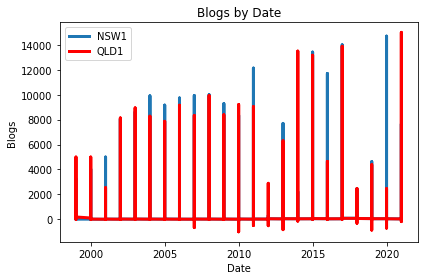

In [128]:
# Plot time series

plt.plot(data.year, data.NSW1, label='NSW1', 
         linewidth=3)
plt.plot(data.year, data.QLD1, color='red', 
         label='QLD1', linewidth=3)

# Add title and labels

plt.title('Blogs by Date')
plt.xlabel('Date')
plt.ylabel('Blogs')

# Add legend

plt.legend()

# Auto space

plt.tight_layout()

# Display plot

plt.show() 
